<div style="font-weight: bold; color:#5D8AA8" align="center">
    <div style="font-size: xx-large">Métodos Funcionales en Aprendizaje Automático</div><br>
    <div style="font-size: x-large; color:gray">Examen 02 - Manifold Learning</div><br>
    <div style="font-size: large; color:#FF0000">Nombre del autor</div><br></div><hr>
</div>

**Configuración Inicial**

In [1]:
%%html
<style>
    .qst {background-color: #b1cee3; padding:10px; border-radius: 5px; border: solid 2px #5D8AA8;}
    .qst:before {font-weight: bold; content:"Pregunta"; display: block; margin: 0px 10px 10px 10px;}
    h1, h2, h3 {color: #5D8AA8;}
    .text_cell_render p {text-align: justify; text-justify: inter-word;}
</style>

In [7]:
from IPython.display import display, Latex

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors

from mpl_toolkits.mplot3d import Axes3D
Axes3D

matplotlib.rc('figure', figsize=(15, 5))

seed = 123
my_cmap = plt.cm.Spectral

# Directrices generales

Este notebook contiene el enunciado de la segunda parte del examen de *Métodos Funcionales en Aprendizaje Automático*.

Por favor, lee con cuidado cada uno de los tres ejercicios así como las preguntas que en ellos se formulan, y explica de manera concisa cada asunción y conclusión que hagas.

Debéis entregar un **informe** (que puede realizarse directamente sobre el notebook) y el **código** implementado para completar los ejercicios, así como las **referencias** consultadas en caso de necesidad. También se debe entregar el **código de honor firmado**. Todo esto se enviará vía Moodle en un *.zip*.

# Ejercicio 1 (3 puntos)

![grafo](grafo.png)
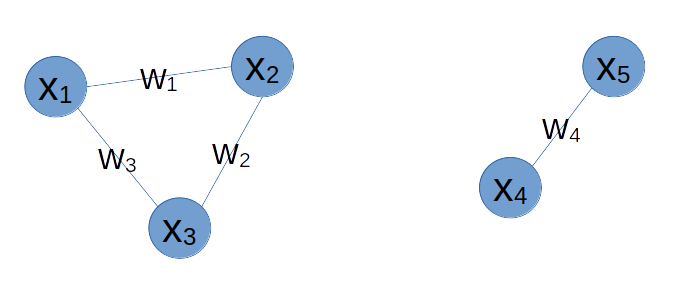

<div class="qst">

* Para el grafo anterior, calcula $f^\top L f$, siendo $L$ el laplaciando del grafo no normalizado ($L = D- W$) cuando $f$ se define como:
    $f(x_1) = 1, f(x_2) = 2, f(x_3) = 6, f(x_4) = 5, f(x_5) = 4$
  si los pesos del grafo son:
    $w_1 = 20, w_2 = 10, w_3 = 1, w_4 = 5$.
</div>

In [26]:
# Weighted matrix
W = np.array([
    [0, 20, 1, 0, 0],
    [20, 0, 10, 0, 0],
    [1, 10, 0, 0, 0],
    [0, 0, 0, 0, 5],
    [0, 0, 0, 5, 0]
])

# Degree matrix
D = np.diag(W.sum(axis=1))

# Unormalized Laplacian
L = D - W
print("L =  \n", L)

# Eigenvector
f = np.array([1, 2, 6, 5, 4])

# Compute $f^TLf$
result = f.T@L@f

display(Latex(f'$f^TLf = {result}$'))

L =  
 [[ 21 -20  -1   0   0]
 [-20  30 -10   0   0]
 [ -1 -10  11   0   0]
 [  0   0   0   5  -5]
 [  0   0   0  -5   5]]


<IPython.core.display.Latex object>

<div class="qst">

* Calcula $f^\top L f$ si cambiamos el valor de los pesos $w_1=1$ y $w_3=20$. ¿Cambia el resultado? ¿Por qué? 

</div>

In [27]:
W2 = np.array([
    [0, 1, 20, 0, 0],
    [1, 0, 10, 0, 0],
    [20, 10, 0, 0, 0],
    [0, 0, 0, 0, 5],
    [0, 0, 0, 5, 0]
])

# Degree matrix
D = np.diag(W2.sum(axis=1))

# Unormalized Laplacian
L = D - W2
print("L =  \n", L)

# Eigenvector
f = np.array([1, 2, 6, 5, 4])

# Compute $f^TLf$
result = f.T@L@f

display(Latex(f'$f^TLf = {result}$'))

L =  
 [[ 21  -1 -20   0   0]
 [ -1  11 -10   0   0]
 [-20 -10  30   0   0]
 [  0   0   0   5  -5]
 [  0   0   0  -5   5]]


<IPython.core.display.Latex object>

Vemos que el resultado es mayor, la que la diferencia entre $f_1$ y $f_3$ contribuye con mucha más fuerza que antes, lo que implica un incremento en el resultado final.

<div class="qst">

* Define una función $f$ que minimice $f^\top L f$. ¿Existe más de una solución que minimice $f^\top L f$ , sin tener en cuenta múltiplos de la $f$ definida (de manera más formal, que sea linealmente independiente a la solución dada)? 

</div>

Extraemos de las trasparencias la definición de $f^T\mathbf{L}f$:

$$
f^T\mathbf{L}f = \frac 1 2  \sum_{i,j=1}^N w_{ij}(f_i-f_j)^2 \geq 0, 
$$

de la cual sabemos que $L$ es una matriz semidefinida positiva. Esto implica que el mínimo valor posible que vamos a obtener va a ser $0$, sea cual sea $f$. Definimos, por tanto, la función que vamos a minimizar es:

$$
\Psi(f) = f^T\mathbf{L}f, \text{ con } f \in \mathbb{R}^5,
$$

de la cual obtenemos la función que minimiza $f$ derivando e igualando a 0,

$$
\nabla \Psi (f) = 2Lf = 0; Lf = 0.
$$

De esta forma obtenemos que $f \in \text{kernel}(L)$.

# Ejercicio 2 (4 puntos)

Un algoritmo muy utilizado tanto en el ámbito de manifold learning, como en clustering o en análisis de grafos (por ejemplo para detectar comunidades) es el método de **Spectral Clustering**.
Durante las clases del curso no nos ha dado tiempo a profundizar en él, por lo que vamos a utilizarlo para resolver un problema.

<div class="qst">

* Define una clase **Spectral Clustering**, así como sus funciones fit y fit-transform (no vamos a permitir en este caso la aplicación del método a puntos nuevos fuera de la muestra inicial).
     
* El algoritmo de Spectral Clustering a implementar será el basado en el laplaciano de camino aleatorio, es decir, $L_{rw}=I − D^{−1}W$.
</div>

<div class="qst">

* ¿Qué diferencias aprecias entre este algoritmo y *Diffusion Maps*?
    
</div>

<div class="qst">

* Aplica el algoritmo definido al siguiente conjunto de datos.

    * ¿Se obtiene un buen resultado?

    * ¿Cómo has realizado la selección de hiperparámetros involucrados?
    
</div>

In [ ]:
data = np.loadtxt('data.txt')
X=data[:,:-1]
y=data[:,-1]

# Ejercicio 3 (3 puntos)

Hasta ahora hemos visto cómo trabajar con una matriz de datos que transformamos en un grafo para aplicar un método de reducción de dimensión espectral, pero todos los algoritmos que hemos vistos podrían aplicarse directamente a un *grafo* con cierta información. Para este ejercicio vamos a trabajar con el grafo del *club de karate de Zacarías* (un ejemplo clásico en teoría de grafos).

Para leer los datos necesitaréis instalar la librería *igraph* y *cairo*, para lo que podéis usar los comandos:<code>
    pip install python-igraph
    pip install pycairo
</code>
Y si os da error porque faltan librerías deberéis instalar:
<code>
    sudo apt install libcairo2-dev
    sudo apt install python3-dev
</code>

Veamos primero que pinta tienen los datos:

In [ ]:
from igraph import *

g=Graph.Read_GML("karate.gml")
summary(g)

# Información de una arista    
print(g.es[0])
# Acceso a la información del primer nodo del grafo
print(g.vs[g.es[0].tuple[0]])
# Acceso a la información del segundo nodo del grafo
print(g.vs[g.es[0].tuple[1]])

El siguiente código permite visualizar el grafo dado.
En este caso permitimos que se seleccione de manera automática el mejor algoritmo de visualización, etiquetamos los nodos por su identificador y lo coloreamos (todo del mismo color pues a priori no conocemos las comunidades).

In [ ]:
layout = g.layout("auto")
g.vs["label"] = [int(idx) for idx in g.vs["id"]]
plot(g, layout=layout, bbox=(0, 0, 300, 300))

<div class="qst">

* Obten la matriz de pesos del grafo a partir de los datos dados usando la librería igraph proporcionada.

</div>

<div class="qst">

* Aplica el algoritmo de Spectral Clustering de manera que se observen lo mejor posible las dos comunidades existentes en el grafo.

</div>